# Sentiment Analysis using twitter Data

In [1]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd

# Dataset

In [2]:
data = pd.read_csv("sentiment.csv")

# Preprocessing

In [3]:
data.rename(columns={'message to examine':'Message',
                     'label (depression result)':'Sentiment'}, inplace= True)

In [4]:
data.head()

,Index,Message,Sentiment
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
# basically index a non-informative parameter, so we can drop index column
data.drop(columns=["Index"], axis= 1, inplace= True)

In [6]:
data.head()

,Message,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
data.shape

(10314, 2)

In [8]:
data.count()

Message      10314
Sentiment    10314
dtype: int64

In [9]:
data['Sentiment'].value_counts()

0    8000
1    2314
Name: Sentiment, dtype: int64

In [10]:
data.dtypes


Message      object
Sentiment     int64
dtype: object

In [11]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()

In [12]:
#Create a empty corpus to hold vector value

In [13]:
# Lets start processing
corpus = []
for i in range(0, data.shape[0]):
#    if i < 10:
#        print("\n",data['Message'][i])
    msg = data["Message"][i]
    # email addess
    msg = re.sub("\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b", "emailaddr", data["Message"][i])

    # url
    msg = re.sub("https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", "url", data['Message'][i])
    
    # Mobile no
    msg = re.sub("/^(\+\d{1,3}[- ]?)?\d{10}$/","mobile", data['Message'][i])
    
    # Number
    msg = re.sub("\d+(\.\d+)?","number",data['Message'][i])

    #Phone number
    msg = re.sub("\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b","phoneno",data['Message'][i])
    
    # punctuation
    msg = re.sub("[^\w\d\s]"," ", data['Message'][i])
    
    # convert to lower case
    msg = msg.lower()

    # craete tokens using split
    msg = msg.split()

    #print only for 10 messages
    #if i < 10:
        #print("Message-After Split: ",msg)
    # apply stemming on it to remove stopwords
    # porter stemmer
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    
    #print("Message-After Stemming: ",msg)
    # preparing message with remaining tokens
    msg = " ".join(msg)
    
    # preparing a corpus
    corpus.append(msg)

In [14]:
# Prepare a vector using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(corpus)
sparse_input = cv.fit_transform(corpus)

# during model implementation we need data in dense format and current input is a sparse data
# convert it to array
input = sparse_input.toarray()

In [49]:
corpus
# input

['real good moment missssssssss much',
 'read manga http plurk com p mzp1e',
 'comeagainjen http twitpic com 2y2lx http www youtub com watch v zogfqvh2me8',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund',
 'sleepi good time tonight though',
 'silkcharm nbn someon alreadi said fiber home mean least regular',
 '23 24ï ½c possibl today nice',
 'nite twittervil workout ciao',
 'danann night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog alreadi blog seattl coffe commun http tinyurl com c5uufd',
 'kisha cnt get u til get frm u rememb ur top',
 'nicolerichi ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'blueaero ooo fantasi like fantasi novel check',
 'rokchic28 prob sell noth blog http snedwan com get listen band itun',
 'shipovalov quot nokla connect peopl quot',
 'stay late start earli good thing like job',
 'kal_penn read new job congratul fantast',
 'abl sleep think wat

In [16]:
data.head()

,Message,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [17]:
# select output i.e Label
output = data.iloc[:,-1]
output.head()

0    0
1    0
2    0
3    0
4    0
Name: Sentiment, dtype: int64

## Data Preprocessing

In [18]:
# we have input and output ready, now split data in input and output sets
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(input, output, test_size=0.2, random_state=0)

In [19]:
xtrain.shape

(8251, 19327)

In [20]:
ytrain.shape

(8251,)

In [21]:
xtest.shape

(2063, 19327)

In [22]:
ytest.shape


(2063,)

## Naive Bayes

Accuracy:
  0.6204556471158507
Confusion Matrix:
  [[850 723]
 [ 60 430]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.54      0.68      1573
           1       0.37      0.88      0.52       490

    accuracy                           0.62      2063
   macro avg       0.65      0.71      0.60      2063
weighted avg       0.80      0.62      0.65      2063

AxesSubplot(0.125,0.125;0.62x0.755)


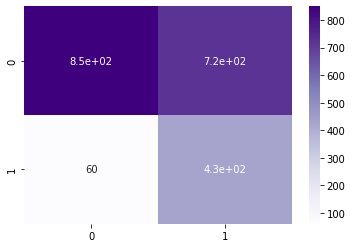

In [25]:
# Create and implement a model for prediction
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(xtrain,ytrain)

# Predicting the Test set results
pred = model_gnb.predict(xtest)

# Let us check accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc1 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc1)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()
cm=confusion_matrix(ytest, pred)
print(sns.heatmap(cm, annot=True, ax = axis,cmap='Purples'))

## Decision Tree

Accuracy:
  0.9970916141541445
Confusion Matrix:
  [[1573    0]
 [   6  484]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1573
           1       1.00      0.99      0.99       490

    accuracy                           1.00      2063
   macro avg       1.00      0.99      1.00      2063
weighted avg       1.00      1.00      1.00      2063

AxesSubplot(0.125,0.125;0.62x0.755)


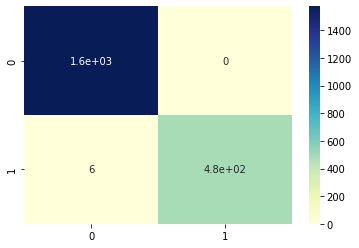

In [27]:
# Create and implement a model for prediction
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

# Predicting the Test set results
pred = model_dt.predict(xtest)

# Lets check accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc2 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc2)

print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

AxesSubplot(0.125,0.125;0.62x0.755)


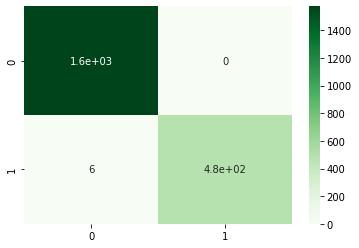

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()

print(sns.heatmap(cm, annot=True, ax = axis,cmap='Greens'))


## Random Forest

In [29]:
# Create and implement a model for prediction
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
# fit and predict values
model_rf.fit(xtrain,ytrain)

# Predicting the Test set results
pred = model_rf.predict(xtest)

# Lets check accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc3 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc3)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

Accuracy:
  0.9966068831798351
Confusion Matrix:
  [[1572    1]
 [   6  484]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1573
           1       1.00      0.99      0.99       490

    accuracy                           1.00      2063
   macro avg       1.00      0.99      1.00      2063
weighted avg       1.00      1.00      1.00      2063



AxesSubplot(0.125,0.125;0.62x0.755)


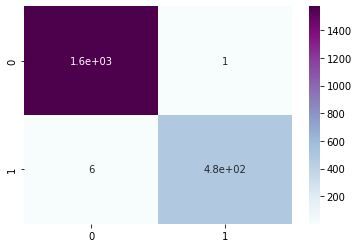

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()

print(sns.heatmap(cm, annot=True, ax = axis,cmap='BuPu'))

## SVM

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
pred = classifier.predict(xtest)

# Let us check the accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc4 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc4)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

Accuracy:
  0.9961221522055259
Confusion Matrix:
  [[1573    0]
 [   8  482]]
Classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      1573
           1       1.00      0.98      0.99       490

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



AxesSubplot(0.125,0.125;0.62x0.755)


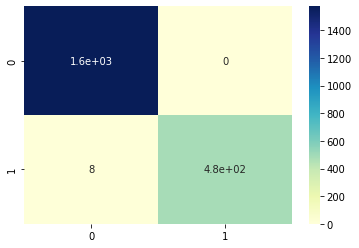

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()

print(sns.heatmap(cm, annot=True, ax = axis,cmap='reds'))

## Kernel SVM

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
pred = classifier.predict(xtest)

# Let us check the accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc5 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc5)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

Accuracy:
  0.9956374212312167
Confusion Matrix:
  [[1569    4]
 [   5  485]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1573
           1       0.99      0.99      0.99       490

    accuracy                           1.00      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



AxesSubplot(0.125,0.125;0.62x0.755)


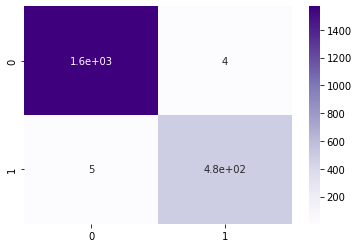

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()

print(sns.heatmap(cm, annot=True, ax = axis,cmap='Purples'))

## KNN

In [35]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
pred = classifier.predict(xtest)

# Let us check the accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc6 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc6)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)

Accuracy:
  0.9815802229762481
Confusion Matrix:
  [[1570    3]
 [  35  455]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1573
           1       0.99      0.93      0.96       490

    accuracy                           0.98      2063
   macro avg       0.99      0.96      0.97      2063
weighted avg       0.98      0.98      0.98      2063



AxesSubplot(0.125,0.125;0.62x0.755)


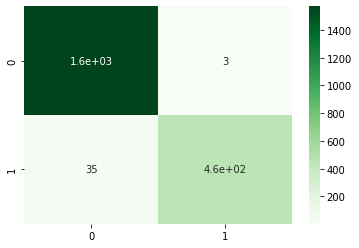

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()

print(sns.heatmap(cm, annot=True, ax = axis,cmap='Greens'))

## XGBoost

In [37]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
pred = classifier.predict(xtest)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc7 = accuracy_score(ytest,pred)
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy:\n ",acc7)
print("Confusion Matrix:\n ",cm)
print("Classification report:\n ",cr)
# Let us check the accuracy of model 
# Applying k-Fold Cross Validation

Accuracy:
  0.9961221522055259
Confusion Matrix:
  [[1573    0]
 [   8  482]]
Classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      1.00      1573
           1       1.00      0.98      0.99       490

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



AxesSubplot(0.125,0.125;0.62x0.755)


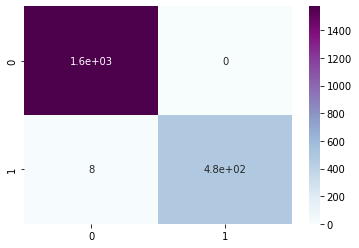

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
axis= plt.subplot()
print(sns.heatmap(cm, annot=True, ax = axis,cmap='BuPu'))

In [40]:
# from sklearn.model_selection import cross_val_score
# acc7 = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 10)
# print("Accuracy: ", acc7.mean())

In [41]:
#
# arr =
# names =
# creating the bar plot
# plt.xticks(names)
#
# plt.show()

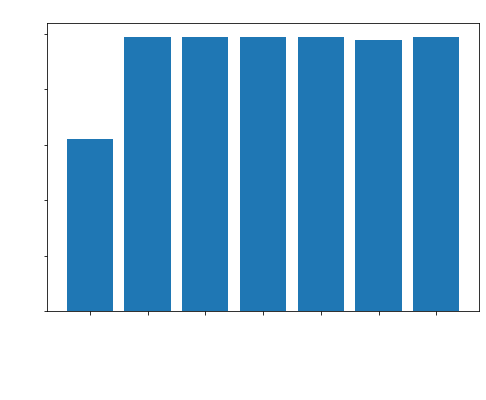

In [42]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'K SVM', 'KNN', 'XGBoost']
values = [int(acc1*100),int(acc2*100), int(acc3*100), int(acc4*100), int(acc5*100), int(acc6*100), int((acc7.mean())*100)]
ax.bar(names,values)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.ylabel("Accuracy", color='white')
# plt.ylabel(color='white')
plt.title("Comparison Of Various Classifiers", color='white')
plt.show()

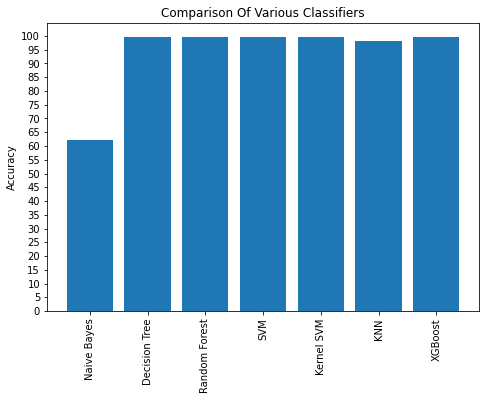

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'Kernel SVM', 'KNN', 'XGBoost']
values = [(acc1*100),(acc2*100),(acc3*100), (acc4*100), (acc5*100), (acc6*100), ((acc7.mean())*100)]
ax.bar(names,values)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,5))
plt.ylabel("Accuracy")
# plt.ylabel(color='white')
plt.title("Comparison Of Various Classifiers")
plt.show()